In [1]:
library(nlme)

    VertexID         Time            Area        
 v20450 :  12   Min.   : 1.00   Min.   :   0.00  
 v19600 :  12   1st Qu.:43.85   1st Qu.:  10.18  
 v20850 :  12   Median :46.83   Median :  15.53  
 v19800 :  12   Mean   :47.40   Mean   :  49.54  
 v9250  :  12   3rd Qu.:54.49   3rd Qu.:  34.12  
 v800   :  12   Max.   :74.00   Max.   :3643.75  
 (Other):5148                                    

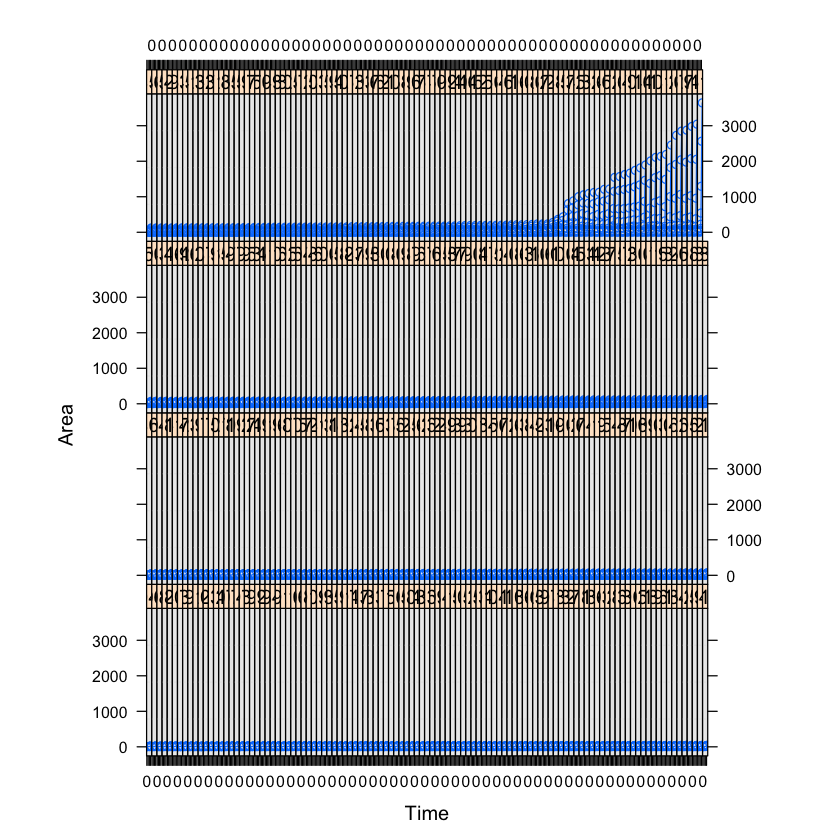

In [7]:
# Load data
brain <- read.csv(file="/Users/roberto/Desktop/growth_curves_per_vertex.txt",head=TRUE,sep="\t",stringsAsFactors=F)

# Group (if using nlme)
brain <- groupedData(Area ~ Time | VertexID, data=brain)

# scale Area
brain$Area = brain$Area*10

# convert postnatal age into gestation age by adding 42
# brain$Time = brain$Time + 42

brain<-brain[!brain$VertexID=="v10500",]
brain<-brain[!brain$VertexID=="v17000",]
brain<-brain[!brain$VertexID=="v17500",]
brain<-brain[!brain$VertexID=="v6500",]

brain<-brain[!brain$VertexID=="v14000",]

brain<-brain[!brain$VertexID=="v2000",]

brain<-brain[!brain$VertexID=="v6600",]

brain<-brain[!brain$VertexID=="v150",]

brain<-brain[!brain$VertexID=="v20750",]






# Data viz
plot(brain)
#str(brain)
summary(brain)

In [8]:
# Fit nonlinear model using nls (a single model is fit to all data, disregarding subjects)
res<-nls(Area ~ SSlogis(Time,A,B,C),data=brain)
print(res)

Nonlinear regression model
  model: Area ~ SSlogis(Time, A, B, C)
   data: brain
      A       B       C 
207.146  59.642   5.656 
 residual sum-of-squares: 163460014

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.506e-09


Call:
  Model: Area ~ SSlogis(Time, A, B, C) | VertexID 
   Data: brain 

Coefficients:
                A         B         C
v20450   12.17113  28.69687  7.930467
v19600   13.74363  38.44413  4.539736
v20850   14.39195  33.24002 12.892476
v19800   15.03732  40.01118  3.673858
v9250    14.13588  40.75183  2.288440
v800     14.29991  40.98724  2.294715
v21750   19.24868  45.11252 18.223276
v7350    15.04351  41.20275  2.387263
v5950    17.08842  40.54050  7.377704
v21100   19.48128  42.58428 13.948512
v22050   22.35476  50.18438 15.892664
v6200    18.47098  40.16682  9.964410
v21300   21.13510  44.44120 15.092894
v21200   21.29721  44.87047 13.950018
v6450    20.49175  46.00243  8.426023
v19700   18.47331  40.50472  8.422512
v10700   18.85937  42.44138  3.126801
v21400   22.12581  44.48920  9.559120
v19750   21.01197  42.69306  6.406641
v6850    22.11131  44.06866  7.807647
v1900    23.06614  45.98988  8.866211
v21950   24.49332  46.96715 10.310351
v7250    25.78604  46.88642  9.990297


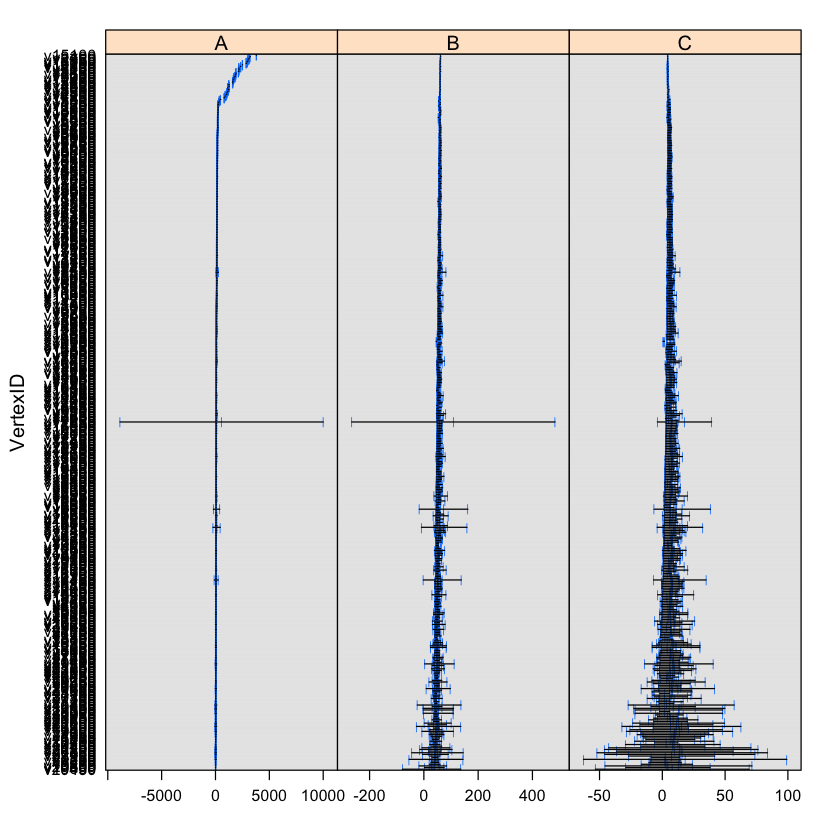

In [9]:
# Fit separate nonlinear models by group using nlsList
res2<-nlsList(Area~SSlogis(Time,A,B,C)|VertexID,data=brain)
print(res2)
#plot(res2)
#plot(res2,VertexID~resid(.),abline=0)
plot(intervals(res2),layout=c(3,1))
#pairs(res2,id=0.1)



Nonlinear mixed-effects model fit by maximum likelihood
  Model: Area ~ SSlogis(Time, A, B, C) 
 Data: brain 
       AIC      BIC    logLik
  42188.44 42234.36 -21087.22

Random effects:
 Formula: list(A ~ 1, B ~ 1)
 Level: VertexID
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev     Corr 
A        495.418087 A    
B          3.816401 0.535
Residual   8.581453      

Fixed effects: list(A ~ 1, B ~ 1, C ~ 1) 
      Value Std.Error   DF  t-value p-value
A 193.07875 23.762696 4783   8.1253       0
B  52.99372  0.199961 4783 265.0204       0
C   4.37658  0.010129 4783 432.0790       0
 Correlation: 
  A     B    
B 0.493      
C 0.005 0.049

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-8.2592338 -0.1503657  0.1982577  0.4497951  8.8231835 

Number of Observations: 5220
Number of Groups: 435 

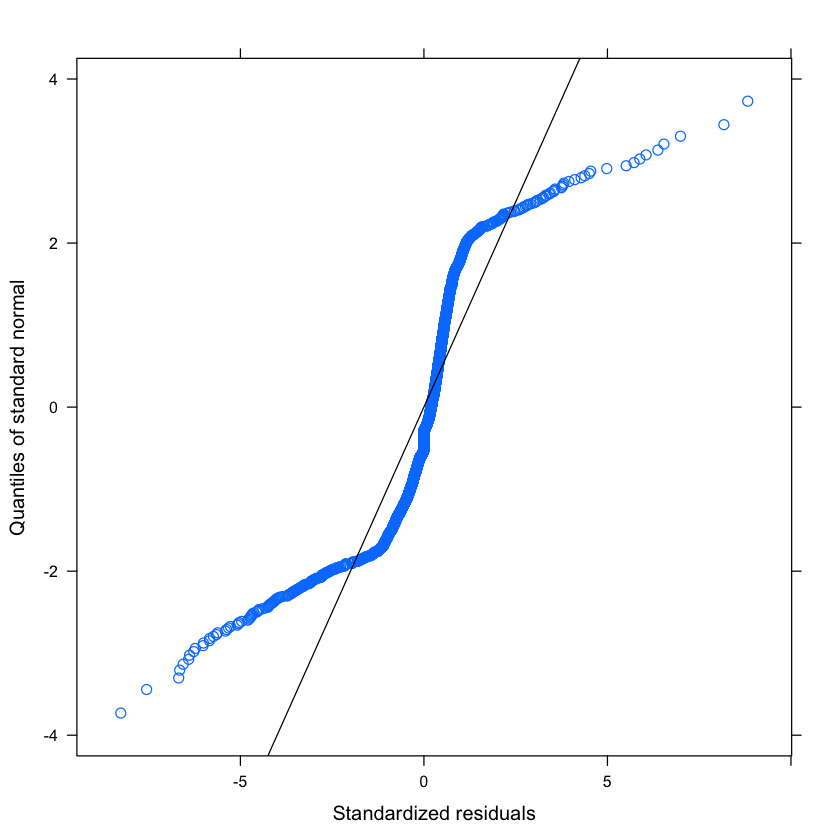

In [10]:
# Nonlinear mixed-effects model
#resl3<-nlme(model=Area~SSlogis(Time,A,B,C),data=brain,fixed=A+B+C~1,random=A~1, start=c(A=2.5,B=42,C=0.9))
resl3<-nlme(res2,random=A+B~1)
summary(resl3)
qqnorm(resl3,abline=c(0,1))

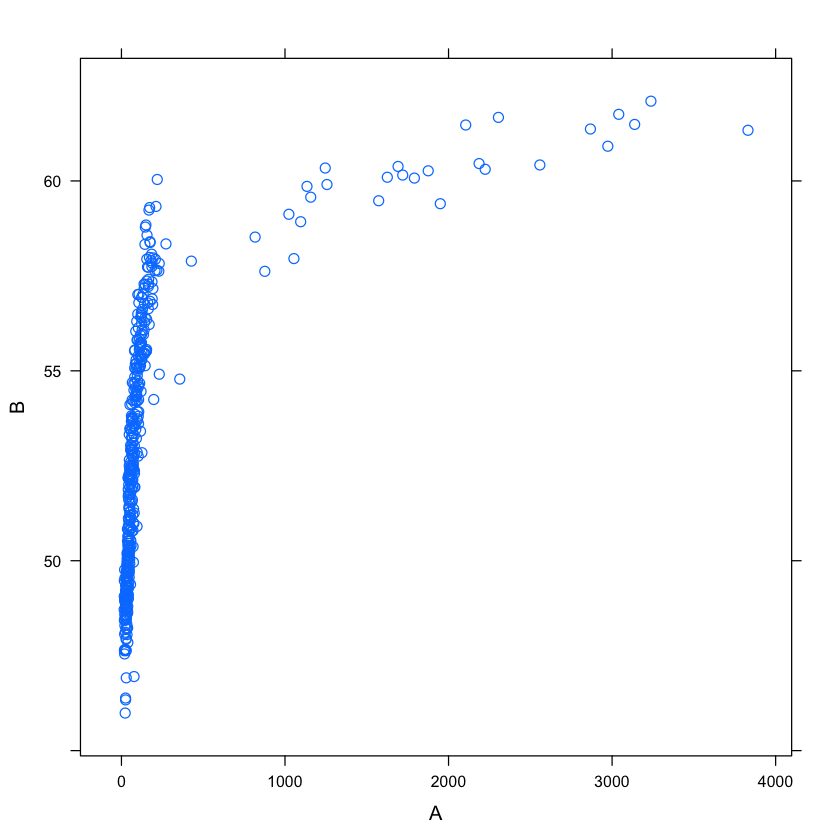

In [11]:
pairs(resl3)

In [75]:
augPred(resl3,level=0:1)

                         Time .groups               Area            .type
1                           1      v0              1e-05         original
2                          42      v0           0.121595         original
3                     43.4142      v0           0.118327         original
4                          44      v0           0.120074         original
5                     44.8284      v0           0.136513         original
6                          46      v0            0.16931         original
7                     47.6569      v0           0.216568         original
8                          50      v0           0.286708         original
9                     53.3137      v0           0.407422         original
10                         58      v0           0.617365         original
11                    64.6274      v0           0.904628         original
12                         74      v0            1.12324         original
13                          1     v50 